---
# Carbon Dioxide Pre-processing
---

In this notebook, we will read various dataset of global carbon dioxide concentration that differ in observation frequency. The dataset will be combined together and will be interpolated to a yearly frequency where needed.

1. Read the data files
2. Plot the data to see how the concentration in the overlapping time period could be merged into one single observation dataframe.
  - From the plot, we can see that the observations and the various predictions can be combined with an interpolation with a polynomial of second degree between the end of the observation period up to 2040.
  - From the plot, we can see that for the overlapping observations priod there is no need for any interpolation, since there is no discontinuity between the two observation dataset.
4. Performing the interpolation to create a continuous line for the carbon dioxide concentration from 1850 to 2099.
5. Making sure that the results match well the uninterpolated dataset.
6. Writing the results to files


**Source :**

https://sealevel.info/co2_and_ch4.html

**Carbon Dioxide**

https://data.giss.nasa.gov/modelforce/ghgases/Fig1A.ext.txt

https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.txt


**Forecast:**
https://gmd.copernicus.org/articles/13/3571/2020/

https://greenhousegases.science.unimelb.edu.au/#!/view



### Importing necessary libraries

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

### Define files and variables

In [2]:
data_dir = '../data/GreenHouse_Gases/'

data_1850_2011 = 'co2_1850-2011.txt' # Tab separated

data_1959_2024 = 'co2_annmean_mlo_1959-2024.txt' # Spaces separated

out_dir = '../data/GreenHouse_Gases/processed/'

file_out_weak = 'co2_1850-2099_SSP4_34.csv'
file_out_mod = 'co2_1850-2099_SSP2_45.csv'
file_out_high = 'co2_1850-2099_SSP4_60.csv'
file_out_xtrm = 'co2_1850-2099_SSP5_85.csv'

start_year_fcst = 2040
end_year_fcst = 2099

file_fcst_weak = '../data/GreenHouse_Gases/SSP4-34_WeakScenario.xlsx'
file_fcst_mod = '../data/GreenHouse_Gases/SSP2-4.5_ModerateScenario.xlsx'
file_fcst_high = '../data/GreenHouse_Gases/SSP4-6.0_HighScenario.xlsx'
file_fcst_xtrm = '../data/GreenHouse_Gases/SSP5-8.5_ExtremeScenario.xlsx'

### Read data files

In [3]:
fcst_weak = pd.read_excel(file_fcst_weak, skiprows=10)

fcst_weak = fcst_weak[fcst_weak['Year'] <= end_year_fcst]
fcst_weak['Year'] = pd.to_datetime(fcst_weak['Year'], format="%Y")
fcst_weak.drop(columns=['CH4'], inplace=True)
fcst_weak.set_index('Year', inplace=True)
fcst_weak

,CO2
Year,
2015-01-01,399.949310
2016-01-01,403.116974
2017-01-01,405.742950
2018-01-01,408.556976
2019-01-01,411.339966
...,...
2095-01-01,480.464020
2096-01-01,479.184021
2097-01-01,477.835022


In [4]:
fcst_mod = pd.read_excel(file_fcst_mod, skiprows=10)

fcst_mod = fcst_mod[fcst_mod['Year'] <= end_year_fcst]
fcst_mod['Year'] = pd.to_datetime(fcst_mod['Year'], format="%Y")
fcst_mod.drop(columns=['CH4'], inplace=True)
fcst_mod.set_index('Year', inplace=True)
fcst_mod

,CO2
Year,
2015-01-01,399.949097
2016-01-01,403.116974
2017-01-01,405.761963
2018-01-01,408.631958
2019-01-01,411.505951
...,...
2095-01-01,600.885986
2096-01-01,601.365967
2097-01-01,601.796997


In [5]:
fcst_high = pd.read_excel(file_fcst_high, skiprows=10)

fcst_high = fcst_high[fcst_high['Year'] <= end_year_fcst]
fcst_high['Year'] = pd.to_datetime(fcst_high['Year'], format="%Y")
fcst_high.drop(columns=['CH4'], inplace=True)
fcst_high.set_index('Year', inplace=True)
fcst_high

,CO2
Year,
2015-01-01,399.949402
2016-01-01,403.116974
2017-01-01,405.742950
2018-01-01,408.556976
2019-01-01,411.339966
...,...
2095-01-01,659.567993
2096-01-01,661.474976
2097-01-01,663.311951


In [6]:
fcst_xtrm = pd.read_excel(file_fcst_xtrm, skiprows=10)

fcst_xtrm = fcst_xtrm[fcst_xtrm['Year'] <= end_year_fcst]
fcst_xtrm['Year'] = pd.to_datetime(fcst_xtrm['Year'], format="%Y")
fcst_xtrm.drop(columns=['CH4'], inplace=True)
fcst_xtrm.set_index('Year', inplace=True)
fcst_xtrm

,CO2
Year,
2015-01-01,399.948792
2016-01-01,403.116974
2017-01-01,405.793976
2018-01-01,408.759949
2019-01-01,411.789948
...,...
2095-01-01,1066.849854
2096-01-01,1080.529907
2097-01-01,1094.209839


In [7]:
obs_1850_2011 = pd.read_csv(os.path.join(data_dir, data_1850_2011), sep='\t', skiprows=2)

obs_1850_2011['Year'] = pd.to_datetime(obs_1850_2011['Year'],  format="%Y")
obs_1850_2011.set_index('Year', inplace=True)
obs_1850_2011.rename(columns={'MixR':'CO2'}, inplace=True)

obs_1850_2011

,Data Source,CO2
Year,,
1850-01-01,Ice-Core Data Adjusted for Global Mean,285.20
1851-01-01,Ice-Core Data Adjusted for Global Mean,285.10
1852-01-01,Ice-Core Data Adjusted for Global Mean,285.00
1853-01-01,Ice-Core Data Adjusted for Global Mean,285.00
1854-01-01,Ice-Core Data Adjusted for Global Mean,284.90
...,...,...
2007-01-01,NOAA/ESRL trends change added to 2003 data,383.37
2008-01-01,NOAA/ESRL trends change added to 2003 data,385.46
2009-01-01,NOAA/ESRL trends change added to 2003 data,386.95


In [8]:
obs_1959_2024 = pd.read_csv(os.path.join(data_dir, data_1959_2024), sep='\s+', skiprows=44)

obs_1959_2024.rename(columns={'year':'Year','mean':'CO2'}, inplace=True)
obs_1959_2024.drop(columns='unc', inplace=True)

obs_1959_2024['Year'] = pd.to_datetime(obs_1959_2024['Year'],  format="%Y")
obs_1959_2024.set_index('Year', inplace=True)

obs_1959_2024

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1547007/951253274.py:1: SyntaxWarning: invalid escape sequence '\s'
  obs_1959_2024 = pd.read_csv(os.path.join(data_dir, data_1959_2024), sep='\s+', skiprows=44)


,CO2
Year,
1959-01-01,315.98
1960-01-01,316.91
1961-01-01,317.64
1962-01-01,318.45
1963-01-01,318.99
...,...
2020-01-01,414.21
2021-01-01,416.41
2022-01-01,418.53


### Plot the data

In [9]:
start_obs2 = obs_1959_2024.index.min()
end_obs2 = obs_1959_2024.index.max()

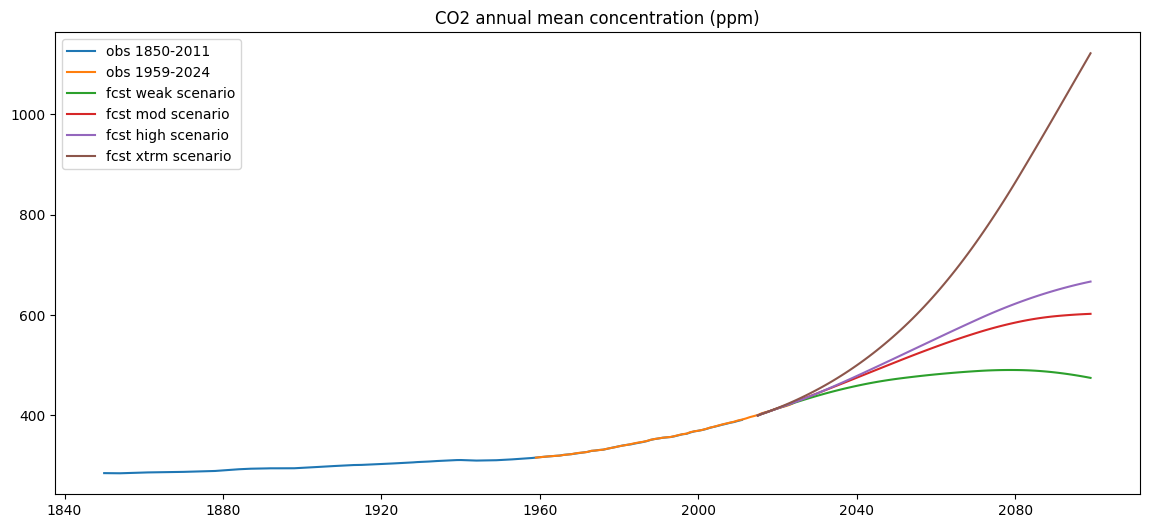

In [10]:
fig = plt.figure(figsize=(14,6))

ax = plt.plot(obs_1850_2011.index, obs_1850_2011['CO2'], label='obs 1850-2011')
ax = plt.plot(obs_1959_2024.index, obs_1959_2024['CO2'], label='obs 1959-2024')

ax = plt.plot(fcst_weak.index, fcst_weak['CO2'], label='fcst weak scenario')
ax = plt.plot(fcst_mod.index, fcst_mod['CO2'], label='fcst mod scenario')
ax = plt.plot(fcst_high.index, fcst_high['CO2'], label='fcst high scenario')
ax = plt.plot(fcst_xtrm.index, fcst_xtrm['CO2'], label='fcst xtrm scenario')

plt.title('CO2 annual mean concentration (ppm)')

plt.legend()

plt.show()

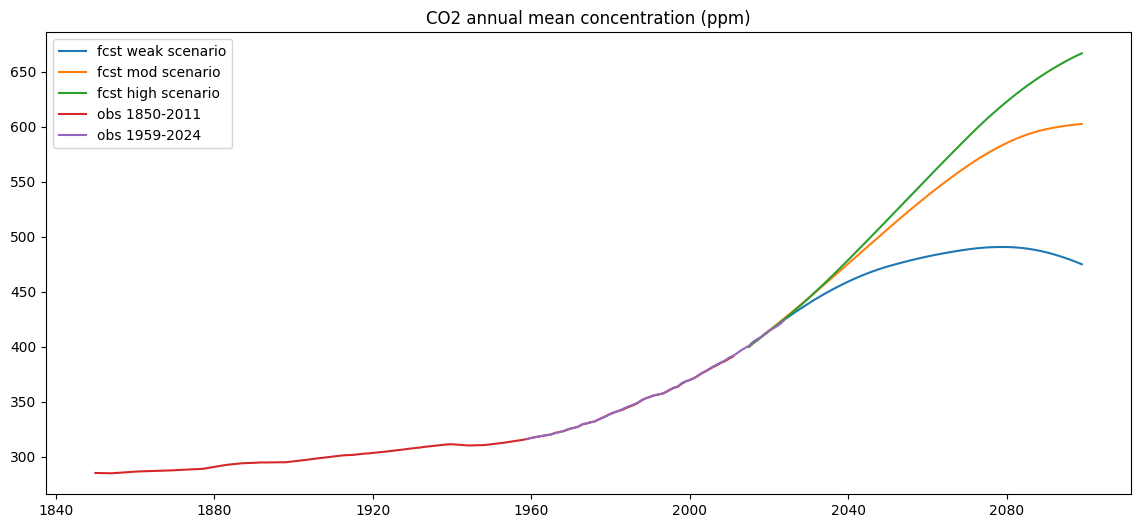

In [11]:
fig = plt.figure(figsize=(14,6))


ax = plt.plot(fcst_weak.index, fcst_weak['CO2'], label='fcst weak scenario')
ax = plt.plot(fcst_mod.index, fcst_mod['CO2'], label='fcst mod scenario')
ax = plt.plot(fcst_high.index, fcst_high['CO2'], label='fcst high scenario')
#ax = plt.plot(fcst_xtrm.index, fcst_xtrm['CO2'], label='fcst xtrm scenario')

ax = plt.plot(obs_1850_2011.index, obs_1850_2011['CO2'], label='obs 1850-2011')
ax = plt.plot(obs_1959_2024.index, obs_1959_2024['CO2'], label='obs 1959-2024')

plt.title('CO2 annual mean concentration (ppm)')

plt.legend()

plt.show()

### Adjust forecast dataset to have the same concentration as observation for year 2024

In [12]:
fcst_weak = pd.concat([ obs_1959_2024.iloc[-1:], fcst_weak[fcst_weak.index >= pd.to_datetime(start_year_fcst, format='%Y')]])
fcst_weak = fcst_weak.resample('YS').interpolate(method='polynomial', order=2)
fcst_weak

,CO2
Year,
2024-01-01,424.610000
2025-01-01,427.203571
2026-01-01,429.732422
2027-01-01,432.203718
2028-01-01,434.617458
...,...
2095-01-01,480.464020
2096-01-01,479.184021
2097-01-01,477.835022


In [13]:
fcst_mod = pd.concat([ obs_1959_2024.iloc[-1:], fcst_mod[fcst_mod.index >= pd.to_datetime(start_year_fcst, format='%Y')]])
fcst_mod = fcst_mod.resample('YS').interpolate(method='polynomial', order=2)
fcst_mod

,CO2
Year,
2024-01-01,424.610000
2025-01-01,427.796644
2026-01-01,430.973283
2027-01-01,434.148624
2028-01-01,437.322668
...,...
2095-01-01,600.885986
2096-01-01,601.365967
2097-01-01,601.796997


In [14]:
fcst_high = pd.concat([ obs_1959_2024.iloc[-1:], fcst_high[fcst_high.index >= pd.to_datetime(start_year_fcst, format='%Y')]])
fcst_high = fcst_high.resample('YS').interpolate(method='polynomial', order=2)
fcst_high

,CO2
Year,
2024-01-01,424.610000
2025-01-01,427.769167
2026-01-01,430.950239
2027-01-01,434.161805
2028-01-01,437.403866
...,...
2095-01-01,659.567993
2096-01-01,661.474976
2097-01-01,663.311951


In [15]:
fcst_xtrm = pd.concat([ obs_1959_2024.iloc[-1:], fcst_xtrm[fcst_xtrm.index >= pd.to_datetime(start_year_fcst, format='%Y')]])
fcst_xtrm = fcst_xtrm.resample('YS').interpolate(method='polynomial', order=2)
fcst_xtrm

,CO2
Year,
2024-01-01,424.610000
2025-01-01,428.576492
2026-01-01,432.632785
2027-01-01,436.789581
2028-01-01,441.046879
...,...
2095-01-01,1066.849854
2096-01-01,1080.529907
2097-01-01,1094.209839


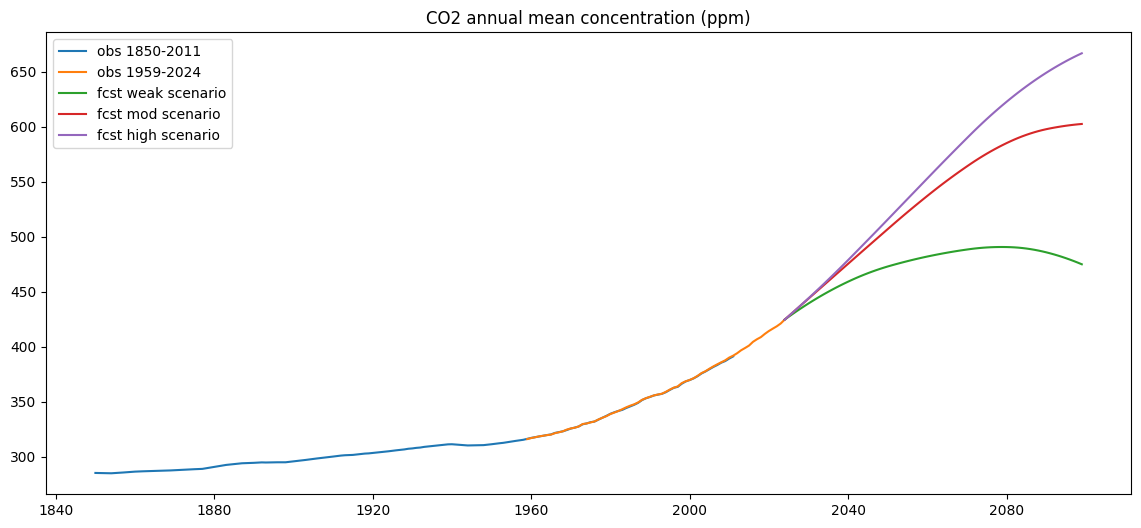

In [16]:
fig = plt.figure(figsize=(14,6))

ax = plt.plot(obs_1850_2011.index, obs_1850_2011['CO2'], label='obs 1850-2011')
ax = plt.plot(obs_1959_2024.index, obs_1959_2024['CO2'], label='obs 1959-2024')

ax = plt.plot(fcst_weak.index, fcst_weak['CO2'], label='fcst weak scenario')
ax = plt.plot(fcst_mod.index, fcst_mod['CO2'], label='fcst mod scenario')
ax = plt.plot(fcst_high.index, fcst_high['CO2'], label='fcst high scenario')
#ax = plt.plot(fcst_xtrm.index, fcst_xtrm['CO2'], label='fcst xtrm scenario')

plt.title('CO2 annual mean concentration (ppm)')

plt.legend()

plt.show()

### Create dataframe that contains the observation from 1850 to 2024

In [17]:
obs_df = pd.concat([obs_1850_2011[obs_1850_2011.index < start_obs2], obs_1959_2024])
obs_df

,Data Source,CO2
Year,,
1850-01-01,Ice-Core Data Adjusted for Global Mean,285.20
1851-01-01,Ice-Core Data Adjusted for Global Mean,285.10
1852-01-01,Ice-Core Data Adjusted for Global Mean,285.00
1853-01-01,Ice-Core Data Adjusted for Global Mean,285.00
1854-01-01,Ice-Core Data Adjusted for Global Mean,284.90
...,...,...
2020-01-01,NaN,414.21
2021-01-01,NaN,416.41
2022-01-01,NaN,418.53


### Looking if there is missing values

In [18]:
obs_df.isna().sum()

Data Source    66
CO2             0
dtype: int64

### Creating a dataframe that contains observations and the forecast data

In [19]:
full_weak_df = pd.concat([obs_df, fcst_weak[fcst_weak.index > end_obs2]])
full_mod_df = pd.concat([obs_df, fcst_mod[fcst_mod.index > end_obs2]])
full_high_df = pd.concat([obs_df, fcst_high[fcst_high.index > end_obs2]])
full_xtrm_df = pd.concat([obs_df, fcst_xtrm[fcst_xtrm.index > end_obs2]])

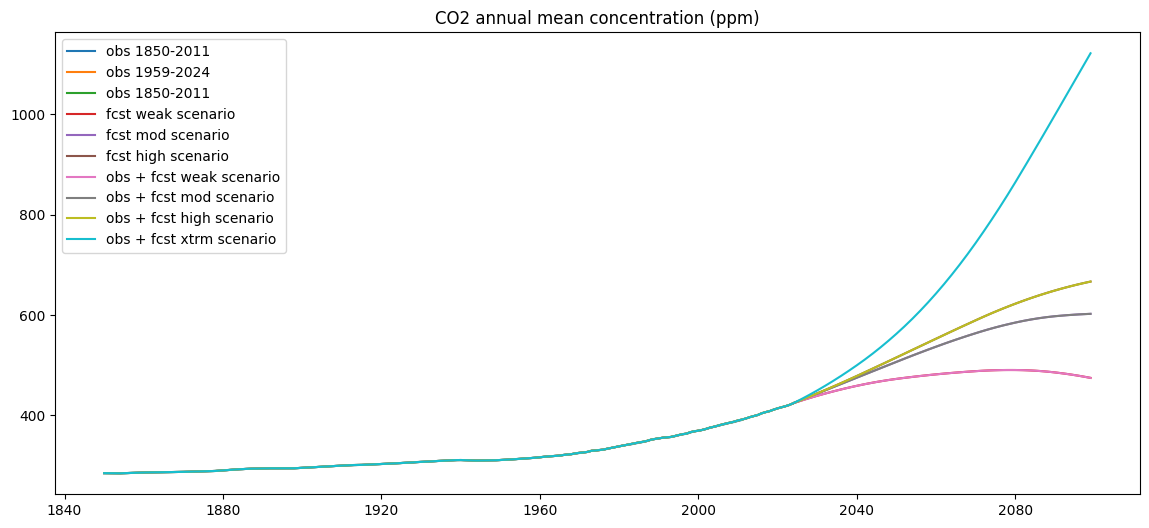

In [20]:
fig = plt.figure(figsize=(14,6))

ax = plt.plot(obs_1850_2011.index, obs_1850_2011['CO2'], label='obs 1850-2011')
ax = plt.plot(obs_1959_2024.index, obs_1959_2024['CO2'], label='obs 1959-2024')
ax = plt.plot(obs_df.index, obs_df['CO2'], label='obs 1850-2011')

ax = plt.plot(fcst_weak.index, fcst_weak['CO2'], label='fcst weak scenario')
ax = plt.plot(fcst_mod.index, fcst_mod['CO2'], label='fcst mod scenario')
ax = plt.plot(fcst_high.index, fcst_high['CO2'], label='fcst high scenario')
#ax = plt.plot(fcst_xtrm.index, fcst_xtrm['CO2'], label='fcst xtrm scenario')

ax = plt.plot(full_weak_df.index, full_weak_df['CO2'], label='obs + fcst weak scenario')
ax = plt.plot(full_mod_df.index, full_mod_df['CO2'], label='obs + fcst mod scenario')
ax = plt.plot(full_high_df.index, full_high_df['CO2'], label='obs + fcst high scenario')
ax = plt.plot(full_xtrm_df.index, full_xtrm_df['CO2'], label='obs + fcst xtrm scenario')

plt.title('CO2 annual mean concentration (ppm)')

plt.legend()

plt.show()

### Write data to file

In [21]:
full_weak_df.to_csv(os.path.join(out_dir, file_out_weak))
full_mod_df.to_csv(os.path.join(out_dir, file_out_mod))
full_high_df.to_csv(os.path.join(out_dir, file_out_high))
full_xtrm_df.to_csv(os.path.join(out_dir, file_out_xtrm))